In [ ]:
%install_ext https://raw.github.com/cpcloud/ipython-autotime/master/autotime.py
%load_ext autotime

In [4]:
#Imports necessários
import numpy as np
import pandas as pds
import collections
from sklearn import preprocessing
from pandas import concat
import matplotlib

In [5]:
#Analise do dataset
data = pds.read_csv('dataset_prediction.csv')
print(len(data))
data.head()

34617


,year,month,week,day,hour,is_weekend,mean_temperature,median_temperature,tstorms,unknown,cloudy,rain_or_snow,not_clear,clear,rentals
0,2014,1,1,2,18,0,21.9,21.9,0,0,0,1,0,0,8
1,2014,1,1,2,19,0,21.9,21.9,0,0,0,1,0,0,5
2,2014,1,1,2,20,0,21.9,21.9,0,0,0,1,0,0,5
3,2014,1,1,2,21,0,21.0,21.0,0,0,0,1,0,0,3
4,2014,1,1,2,22,0,21.0,21.0,0,0,0,1,0,0,3


In [7]:
#Correlação de atributos
corrData = data.copy()
df_corr = corrData.corr()
df_corr

,year,month,week,day,hour,is_weekend,mean_temperature,median_temperature,tstorms,unknown,cloudy,rain_or_snow,not_clear,clear,rentals
year,1.000000,-0.012281,-0.011520,0.000423,-0.002638,0.001325,0.076302,0.076302,0.003549,-0.003490,0.023567,-0.012664,-0.032328,-0.009926,0.168986
month,-0.012281,1.000000,0.969205,-0.006392,-0.006376,-0.014476,0.257745,0.257745,-0.001537,-0.003441,0.041586,-0.061673,0.002691,0.004487,0.147929
week,-0.011520,0.969205,1.000000,-0.007392,-0.006186,-0.015134,0.255064,0.255064,-0.001183,-0.002941,0.036959,-0.058947,0.000403,0.008848,0.144008
day,0.000423,-0.006392,-0.007392,1.000000,-0.003438,-0.026462,-0.016198,-0.016198,-0.012698,0.001871,-0.001572,-0.005611,-0.004731,0.013531,-0.134087
hour,-0.002638,-0.006376,-0.006186,-0.003438,1.000000,0.002205,0.084455,0.084455,0.017825,-0.001143,0.047427,0.003428,-0.029590,-0.065340,0.252474
is_weekend,0.001325,-0.014476,-0.015134,-0.026462,0.002205,1.000000,-0.009158,-0.009158,-0.010013,-0.004803,0.006108,0.006926,-0.004740,-0.010734,-0.002065
mean_temperature,0.076302,0.257745,0.255064,-0.016198,0.084455,-0.009158,1.000000,1.000000,0.075140,0.003980,0.174433,-0.152806,-0.019605,-0.105052,0.475935
median_temperature,0.076302,0.257745,0.255064,-0.016198,0.084455,-0.009158,1.000000,1.000000,0.075140,0.003980,0.174433,-0.152806,-0.019605,-0.105052,0.475935
tstorms,0.003549,-0.001537,-0.001183,-0.012698,0.017825,-0.010013,0.075140,0.075140,1.000000,-0.000701,-0.179072,-0.030399,-0.009348,-0.029537,-0.015352
unknown,-0.003490,-0.003441,-0.002941,0.001871,-0.001143,-0.004803,0.003980,0.003980,-0.000701,1.000000,-0.014758,-0.002505,-0.000770,-0.002434,-0.000146


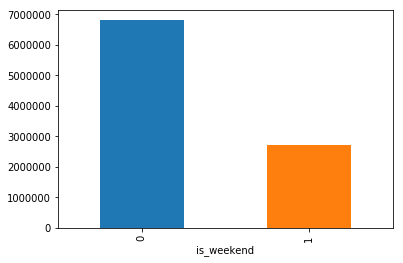

In [6]:
#Dados de locacao de dia de semana por fim de semana
data.groupby(['is_weekend'])['rentals'].sum().plot(kind='bar')

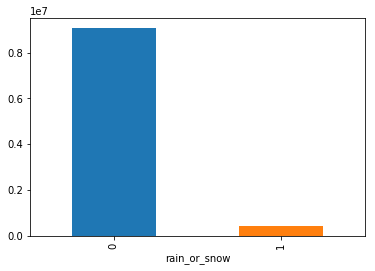

In [4]:
#Dados de locacao por clima (chuva ou neve)
data.groupby(['rain_or_snow'])['rentals'].sum().plot(kind='bar')

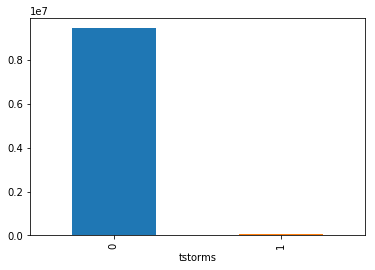

In [5]:
#Dados de locacao por clima nublado
data.groupby(['tstorms'])['rentals'].sum().plot(kind='bar')

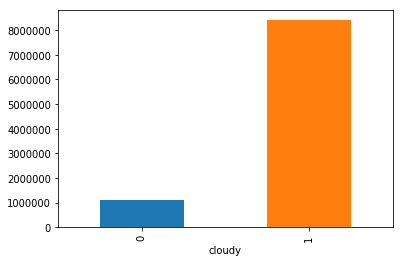

In [6]:
#Dados de locacao por clima nublado
data.groupby(['cloudy'])['rentals'].sum().plot(kind='bar')

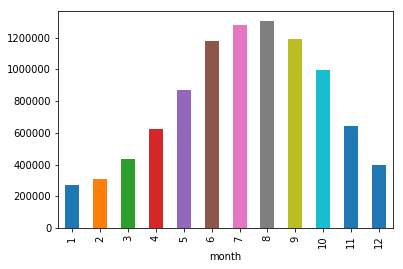

In [7]:
data.groupby(['month'])['rentals'].sum().plot(kind='bar')

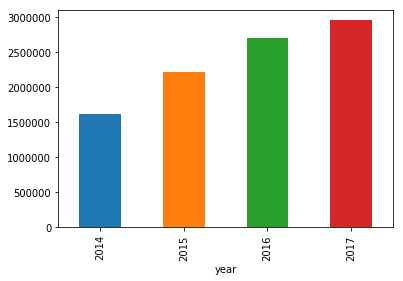

In [8]:
data.groupby(['year'])['rentals'].sum().plot(kind='bar')

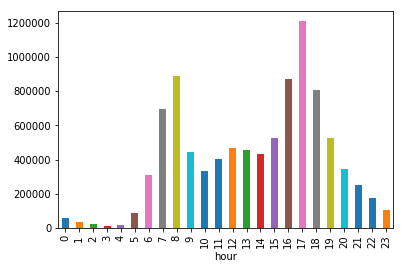

In [9]:
data.groupby(['hour'])['rentals'].sum().plot(kind='bar')

In [10]:
#Pre-Processamento dos dados

#Normalizacao
data.year = preprocessing.scale(list(data.year))
data.month = preprocessing.scale(list(data.month))
data.week = preprocessing.scale(list(data.week))
data.day = preprocessing.scale(list(data.day))
data.hour = preprocessing.scale(list(data.hour))
data.mean_temperature = preprocessing.scale(list(data.mean_temperature))
data.median_temperature = preprocessing.scale(list(data.median_temperature))

#Visualização dos dados
data.head()

,year,month,week,day,hour,is_weekend,mean_temperature,median_temperature,tstorms,unknown,cloudy,rain_or_snow,not_clear,clear,rentals
0,-1.355974,-1.618162,-1.72137,-0.5043,0.935679,0,-1.416148,-1.416148,0,0,0,1,0,0,8
1,-1.355974,-1.618162,-1.72137,-0.5043,1.080493,0,-1.416148,-1.416148,0,0,0,1,0,0,5
2,-1.355974,-1.618162,-1.72137,-0.5043,1.225306,0,-1.416148,-1.416148,0,0,0,1,0,0,5
3,-1.355974,-1.618162,-1.72137,-0.5043,1.370120,0,-1.459628,-1.459628,0,0,0,1,0,0,3
4,-1.355974,-1.618162,-1.72137,-0.5043,1.514933,0,-1.459628,-1.459628,0,0,0,1,0,0,3


In [11]:
#Verificacao de dados do dataset
collections.Counter(data.is_weekend)

Counter({0: 24740, 1: 9877})

In [12]:
#Modelos a serem testados
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, BayesianRidge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor

#Retirada da variável target das features de predição
X = data.drop('rentals',1)
y = data.rentals

#Separação de conjunto de testes
X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

#Separação de conjunto de validação
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.2, random_state=0)  

C:\Users\Alexandre\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
#Treinamento de modelos 
lr = LinearRegression(n_jobs=5, fit_intercept=True)
logr = LogisticRegression(penalty='l2', C=1.0, fit_intercept=True, random_state=0, solver='liblinear', n_jobs=5)
dt = DecisionTreeRegressor(max_depth=10, criterion='mse', splitter='best', random_state=0, presort=True)
dtr = AdaBoostRegressor(dt,n_estimators=500, learning_rate=0.1, random_state=0)
rf = RandomForestRegressor(n_estimators=100, criterion='mse', max_features='auto', random_state=0, n_jobs=5)
blr = BayesianRidge(n_iter=1000, fit_intercept=True)

#Criacao de vetor de modelos
algs = []
algs.append(lr)
algs.append(logr)
algs.append(dt)
algs.append(dtr)
algs.append(rf)
algs.append(blr)

#Fit dos modelos
for alg in algs:
    print('Fitting: ', type(alg).__name__)
    alg.fit(X_model, y_model)  

C:\Users\Alexandre\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\logistic.py:1232: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 5.
  " = {}.".format(self.n_jobs))


Fitting:  LinearRegression
Fitting:  LogisticRegression
Fitting:  DecisionTreeRegressor
Fitting:  AdaBoostRegressor
Fitting:  RandomForestRegressor
Fitting:  BayesianRidge


In [14]:
#Definição de dataframe para exibição de resultados
results = pds.DataFrame(columns=['Name', 'Type', 'R2', 'MAE', 'MSE'])

In [15]:
#Função para display de resultados
def appendResult(alg, dataType, X, y):
    algName = type(alg).__name__
    predicted = alg.predict(X)
    mae = mean_absolute_error(y, predicted)
    mse = mean_squared_error(y, predicted)
    r2 = r2_score(y, predicted)
    results.loc[len(results)]=[algName, dataType, r2, mae, mse]

In [16]:
#Treinamento
for alg in algs:
    appendResult(alg, 'Train', X_train, y_train)

In [17]:
#Validação do treinamento
for alg in algs:
    appendResult(alg, 'Validation', X_val, y_val)

In [19]:
#Teste final
for alg in algs:
    appendResult(alg, 'Test', X_test, y_test)
    
results

,Name,Type,R2,MAE,MSE
0,LinearRegression,Train,0.323172,187.214701,72950.157922
1,LogisticRegression,Train,-0.083556,200.826578,116788.336282
2,DecisionTreeRegressor,Train,0.893314,57.073984,11498.862146
3,AdaBoostRegressor,Train,0.969952,40.341926,3238.639710
4,RandomForestRegressor,Train,0.991510,14.508301,915.028547
5,BayesianRidge,Train,0.323140,187.200312,72953.635601
6,LinearRegression,Validation,0.320538,186.328214,71867.368830
7,LogisticRegression,Validation,-0.081194,201.124391,114358.864777
8,DecisionTreeRegressor,Validation,0.881600,59.083956,12523.314164
9,AdaBoostRegressor,Validation,0.968995,40.807981,3279.447613
